# Compare the results from different `kissim` runs

Compare results (kinase matrices) from different runs:

- `matrix_wbug`: **Run on 20210508**; based on KLIFS dataset from 20210114; **with** charged-THR bug
- `matrix_wobug`: **Run on 20210708**; based on KLIFS dataset from 20210114; without charged-THR bug
- `matrix_2019`: 2019 dataset

In [1]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from kissim.comparison.tree import PROBLEMATIC_KINASES

In [2]:
HERE = Path(_dh[-1])  # noqa: F821
RESULTS = HERE / "../../results/"

In [3]:
def matrix_diff(df1, df2, title, kinases):
    """
    Show difference between two matrices (heatmap) and value distribution for different kinases.
    """

    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    df_diff = df1 - df2
    pd.concat([df1.unstack(), df2.unstack()], axis=1).plot(
        kind="box", ax=axes[0][0], title="Distance distribution per matrix"
    )
    df1.corrwith(df2, axis=0).plot(
        kind="hist", ax=axes[0][1], title="Correlation between distance matrices"
    )
    sns.heatmap(df_diff, square=True, center=0, cmap="PiYG", ax=axes[1][0])
    axes[1][0].set_title("Difference between distance matrices")
    df_diff[kinases].plot(
        kind="kde", ax=axes[1][1], title="Selected distance matrices differences"
    )

## Comparison with/without charged-THR bug

In [4]:
# Load matrices with and without bug
matrix_wbug = pd.read_csv(
    RESULTS / "20210508/fingerprint_distances_to_kinase_matrix.csv", index_col=0
)
matrix_wbug = matrix_wbug.drop(columns=PROBLEMATIC_KINASES).drop(index=PROBLEMATIC_KINASES)
matrix_wobug = pd.read_csv(
    RESULTS / "20210708/fingerprint_distances_to_kinase_matrix.csv", index_col=0
)
matrix_wobug = matrix_wobug.drop(columns=PROBLEMATIC_KINASES).drop(index=PROBLEMATIC_KINASES)

print(matrix_wbug.shape)
print(matrix_wobug.shape)
print(f"Kinases all the same: {all(matrix_wbug.columns == matrix_wobug.columns)}")

(291, 291)
(291, 291)
Kinases all the same: True


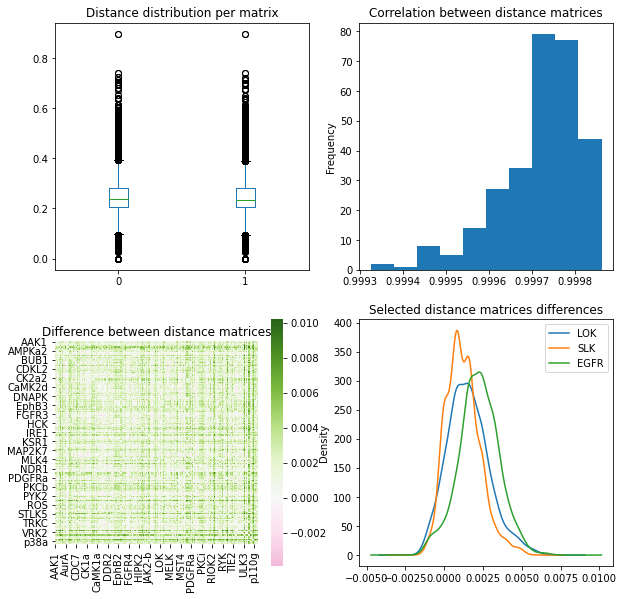

In [5]:
matrix_diff(matrix_wbug, matrix_wobug, "Bug vs. no bug", ["LOK", "SLK", "EGFR"])

## Comparison 2019 and 2021 data

In [6]:
# Load matrix from 2019 and convert similarities > distances
matrix_2019 = pd.read_csv(
    RESULTS / "201909xx/data/best_scores_type2_normballester.csv", index_col=0
)
matrix_2019 = 1 - matrix_2019
for kinase_name in matrix_2019.columns:
    matrix_2019.loc[kinase_name, kinase_name] = 0.0
matrix_2019 = matrix_2019.drop(columns=PROBLEMATIC_KINASES).drop(index=PROBLEMATIC_KINASES)
# Get intersecting kinases between 2019 and 2021 matrices
intersecting_kinases = list(set(matrix_wobug) & set(matrix_2019.columns))
matrix_2019_intersect = matrix_2019.loc[intersecting_kinases, intersecting_kinases]
matrix_wobug_intersect = matrix_wobug.loc[intersecting_kinases, intersecting_kinases]
print(matrix_2019_intersect.shape)
print(matrix_wobug_intersect.shape)
print(
    f"Kinases all the same: {all(matrix_2019_intersect.columns == matrix_wobug_intersect.columns)}"
)

(252, 252)
(252, 252)
Kinases all the same: True


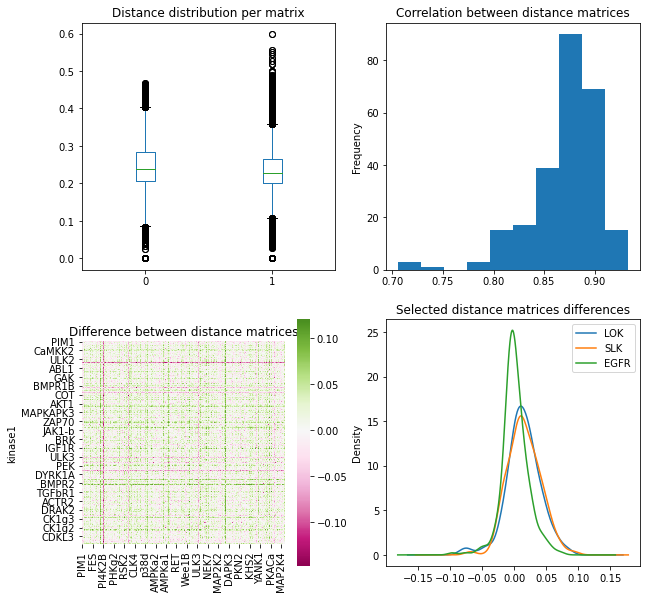

In [7]:
matrix_diff(
    matrix_2019_intersect,
    matrix_wobug_intersect,
    "Intersecting 2019 and 2021 data",
    ["LOK", "SLK", "EGFR"],
)

Look at extreme differences:

In [8]:
matrix_diff = matrix_2019_intersect - matrix_wobug_intersect
matrix_diff.mean().sort_values()

PI4K2B   -0.083217
FRAP     -0.058180
p110d    -0.045177
PI4K2A   -0.044922
p110a    -0.043458
            ...   
AXL       0.046769
CK1e      0.047017
ErbB2     0.052017
GPRK4     0.058079
PASK      0.066976
Length: 252, dtype: float64